In [9]:
import pandas as pd
import os
import OxiAnalysis as OA
import warnings; warnings.simplefilter('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD022545/mzml_files/QuantifiedPeptides.tsv", sep="\t")
quant = quant.drop(quant.filter(regex=r"Detection|Gene|Organism|H2O2"), axis=1)
uniprot = pd.read_csv("/home/robbe/ionbot/full_projects_/PXD022545/PXD022545_first.csv")
uniprot = uniprot[["matched_peptide", "proteins"]]

In [11]:
cols = ['Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234',
       'Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719',
       'Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239',]

In [12]:
OA.quantile_transform(quant,cols)

,Sequence,Base Sequence,Protein Groups,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Unnamed: 17
0,AAAAAAAAAVSRnan,AAAAAAAAAVSR,ZFP91_HUMAN,3.740595,3.598344,NaN,NaN
1,AAAAAAAGDSDSWDADAFSVEDPVRK12|[5]Carbamyl[S],AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J_HUMAN,3.723749,NaN,3.576714,NaN
2,AAAAAAALQAKnan,AAAAAAALQAK,RL4_HUMAN,6.375439,6.044869,6.736737,NaN
3,AAAAADGPPAADGEDGQDPHSK4|semi_tryptic,AAAAADGPPAADGEDGQDPHSK,TXND5_HUMAN,4.128794,4.581340,3.772819,NaN
4,AAAAADLANRnan,AAAAADLANR,NaN,3.878141,4.508245,4.170794,NaN
...,...,...,...,...,...,...,...
34439,YYTVFDRDNNRnan,YYTVFDRDNNR,CATD_HUMAN,NaN,5.404300,2.890858,NaN
34440,YYTVFDRnan,YYTVFDR,CATD_HUMAN,6.515225,6.691287,6.657141,NaN
34441,YYVTIIDAPGHRDFIKnan,YYVTIIDAPGHRDFIK,NaN,5.279995,5.535589,5.930679,NaN
34442,YYVTIIDAPGHRnan,YYVTIIDAPGHR,NaN,6.745909,6.832146,7.084362,NaN


In [13]:
quantprot = quant[~quant["Protein Groups"].isna()]

In [14]:
quantprot['Counts'] = quantprot.groupby(['Base Sequence'])['Sequence'].transform('count')

In [76]:
quantprot = quantprot.dropna(thresh=7, axis=0)

In [78]:
quantprot['median']=quantprot.filter(like='Intensity').apply(lambda x: x.median(), axis=1)

In [80]:
quantprot["Total_peptide_intensity"] = quantprot.groupby(["Base Sequence"])["median"].transform('sum')

In [81]:
quantprot

,Sequence,Base Sequence,Protein Groups,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Unnamed: 17,Counts,median,Total_peptide_intensity
2,AAAAAAALQAKnan,AAAAAAALQAK,RL4_HUMAN,6.375439,6.044869,6.736737,NaN,1,6.375439,6.375439
3,AAAAADGPPAADGEDGQDPHSK4|semi_tryptic,AAAAADGPPAADGEDGQDPHSK,TXND5_HUMAN,4.128794,4.581340,3.772819,NaN,1,4.128794,4.128794
6,AAAAAWEEPSSGNGTAR13|[7]Deamidated[N],AAAAAWEEPSSGNGTAR,RCC2_HUMAN,3.782786,4.145821,4.177017,NaN,3,4.145821,7.944833
8,AAAAAWEEPSSGNGTARnan,AAAAAWEEPSSGNGTAR,RCC2_HUMAN,3.598834,3.799012,4.652049,NaN,3,3.799012,7.944833
9,AAAASAAEAGIATTGTEDSDDALLKnan,AAAASAAEAGIATTGTEDSDDALLK,PSMD4_HUMAN,4.627993,5.070311,4.608334,NaN,1,4.627993,4.627993
...,...,...,...,...,...,...,...,...,...,...
34434,YYSSEYHYVGGFYGGCNEALMK16|[4]carbamidomethyl[C]...,YYSSEYHYVGGFYGGCNEALMK,CATC_HUMAN,2.805123,4.187867,3.994531,NaN,3,3.994531,8.924865
34436,YYTLFGRnan,YYTLFGR,SYEP_HUMAN,5.353875,5.409521,5.516681,NaN,1,5.409521,5.409521
34437,YYTPTISRnan,YYTPTISR,PSB2_HUMAN,4.718954,4.743771,5.008001,NaN,1,4.743771,4.743771
34438,YYTSASGDEMVSLK10|[35]oxidation[M],YYTSASGDEMVSLK,HS90A_HUMAN,5.993059,6.140355,6.080262,NaN,1,6.080262,6.080262


In [82]:
quantprot["Site_occupancy"] = quantprot["median"] / quantprot["Total_peptide_intensity"]

In [16]:
# nonmodifieds2 = nonmodifieds[nonmodifieds["Counts"] == 2]
# modifieds2 = modifieds[modifieds["Counts"] == 2]

In [17]:
# modifieds2['sepcounts'] = modifieds2.groupby("Base Sequence")["Sequence"].transform('count')

In [18]:
# POI = modifieds2[modifieds2['sepcounts'] == 1]

# POI["modifications"] = POI["Sequence"].apply(OA.flashLFQmods)

In [85]:
quantprot["modifications"] = quantprot["Sequence"].apply(OA.flashLFQmods)

In [86]:
quantprot

,Sequence,Base Sequence,Protein Groups,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Unnamed: 17,Counts,median,Total_peptide_intensity,Site_occupancy,modifications
2,AAAAAAALQAKnan,AAAAAAALQAK,RL4_HUMAN,6.375439,6.044869,6.736737,NaN,1,6.375439,6.375439,1.000000,None
3,AAAAADGPPAADGEDGQDPHSK4|semi_tryptic,AAAAADGPPAADGEDGQDPHSK,TXND5_HUMAN,4.128794,4.581340,3.772819,NaN,1,4.128794,4.128794,1.000000,semi_tryptic
6,AAAAAWEEPSSGNGTAR13|[7]Deamidated[N],AAAAAWEEPSSGNGTAR,RCC2_HUMAN,3.782786,4.145821,4.177017,NaN,3,4.145821,7.944833,0.521826,[7]Deamidated[N]
8,AAAAAWEEPSSGNGTARnan,AAAAAWEEPSSGNGTAR,RCC2_HUMAN,3.598834,3.799012,4.652049,NaN,3,3.799012,7.944833,0.478174,None
9,AAAASAAEAGIATTGTEDSDDALLKnan,AAAASAAEAGIATTGTEDSDDALLK,PSMD4_HUMAN,4.627993,5.070311,4.608334,NaN,1,4.627993,4.627993,1.000000,None
...,...,...,...,...,...,...,...,...,...,...,...,...
34434,YYSSEYHYVGGFYGGCNEALMK16|[4]carbamidomethyl[C]...,YYSSEYHYVGGFYGGCNEALMK,CATC_HUMAN,2.805123,4.187867,3.994531,NaN,3,3.994531,8.924865,0.447573,"[[4]carbamidomethyl[C], [35]oxidation[M], [127..."
34436,YYTLFGRnan,YYTLFGR,SYEP_HUMAN,5.353875,5.409521,5.516681,NaN,1,5.409521,5.409521,1.000000,None
34437,YYTPTISRnan,YYTPTISR,PSB2_HUMAN,4.718954,4.743771,5.008001,NaN,1,4.743771,4.743771,1.000000,None
34438,YYTSASGDEMVSLK10|[35]oxidation[M],YYTSASGDEMVSLK,HS90A_HUMAN,5.993059,6.140355,6.080262,NaN,1,6.080262,6.080262,1.000000,[35]oxidation[M]


In [87]:
oxpept = quantprot[quantprot["modifications"].isin(OA.modslist)]

In [88]:
oxpept #Zitten ook peptides in waarvan enkel de gemodificeerde vorm bestaat (SO = 1), dit is mss niet echt goed maar we zien wel

,Sequence,Base Sequence,Protein Groups,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Unnamed: 17,Counts,median,Total_peptide_intensity,Site_occupancy,modifications
12,AAADSDPNLDPLMNPHIR13|[35]oxidation[M],AAADSDPNLDPLMNPHIR,ZFPL1_HUMAN,6.633211,6.621628,6.849495,NaN,1,6.633211,6.633211,1.0,[35]oxidation[M]
24,AAALEAMK7|[35]oxidation[M],AAALEAMK,STIP1_HUMAN,6.272428,6.204885,6.119699,NaN,1,6.204885,6.204885,1.0,[35]oxidation[M]
29,AAAPQAWAGPMEEPPQAQAPPR11|[35]oxidation[M],AAAPQAWAGPMEEPPQAQAPPR,DREB_HUMAN,5.428623,5.452793,5.008730,NaN,1,5.428623,5.428623,1.0,[35]oxidation[M]
50,AADLNGDLTATREEFTAFLHPEEFEHMK27|[35]oxidation[M],AADLNGDLTATREEFTAFLHPEEFEHMK,RCN1_HUMAN,6.050958,5.434660,5.671679,NaN,3,5.671679,5.671679,1.0,[35]oxidation[M]
55,AADPLVGVFLWGVAHSINELSQVPPPVMLLPDDFK28|[35]oxid...,AADPLVGVFLWGVAHSINELSQVPPPVMLLPDDFK,PI42C_HUMAN,4.636092,3.258099,4.369267,NaN,1,4.369267,4.369267,1.0,[35]oxidation[M]
...,...,...,...,...,...,...,...,...,...,...,...,...
34414,YYADGEDAYAMK11|[35]oxidation[M],YYADGEDAYAMK,NAA10_HUMAN,4.011278,4.697887,4.901069,NaN,1,4.697887,4.697887,1.0,[35]oxidation[M]
34415,YYAFPQMITPLVTK7|[35]oxidation[M],YYAFPQMITPLVTK,GAMT_HUMAN,4.288922,4.282113,4.229923,NaN,1,4.282113,4.282113,1.0,[35]oxidation[M]
34418,YYDVMSDEEIER5|[35]oxidation[M],YYDVMSDEEIER,P4HA2_HUMAN,4.119537,4.908150,4.808956,NaN,1,4.808956,4.808956,1.0,[35]oxidation[M]
34428,YYMNQVEETR3|[35]oxidation[M],YYMNQVEETR,THOP1_HUMAN,4.227234,4.202197,4.383903,NaN,1,4.227234,4.227234,1.0,[35]oxidation[M]


In [20]:
# basepeptides = nonmodifieds2.dropna(thresh=7, axis=0)
# modifiedpeptides = POIox.dropna(thresh=8, axis =0)


In [21]:
# basepeptides['median']=basepeptides.filter(like='Intensity').apply(lambda x: x.median(), axis=1)
# modifiedpeptides['median']= modifiedpeptides.filter(like='Intensity').apply(lambda x: x.median(), axis=1)


In [22]:
# data = basepeptides.merge(modifiedpeptides, how="right",on="Base Sequence", suffixes=('_base', '_modified'))

In [23]:
# data = data[data['Sequence_base'].notna()]

In [24]:
# data["Proportion"] = data["median_modified"] / (data["median_modified"] + data["median_base"])

In [90]:
import re
pattern = r"(\d+)\|"
oxpept["position"] = oxpept["Sequence"].apply(lambda x: re.findall(pattern=pattern, string=x)[0])


In [92]:
oxpept.head()

,Sequence,Base Sequence,Protein Groups,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Unnamed: 17,Counts,median,Total_peptide_intensity,Site_occupancy,modifications,position
12,AAADSDPNLDPLMNPHIR13|[35]oxidation[M],AAADSDPNLDPLMNPHIR,ZFPL1_HUMAN,6.633211,6.621628,6.849495,NaN,1,6.633211,6.633211,1.0,[35]oxidation[M],13
24,AAALEAMK7|[35]oxidation[M],AAALEAMK,STIP1_HUMAN,6.272428,6.204885,6.119699,NaN,1,6.204885,6.204885,1.0,[35]oxidation[M],7
29,AAAPQAWAGPMEEPPQAQAPPR11|[35]oxidation[M],AAAPQAWAGPMEEPPQAQAPPR,DREB_HUMAN,5.428623,5.452793,5.008730,NaN,1,5.428623,5.428623,1.0,[35]oxidation[M],11
50,AADLNGDLTATREEFTAFLHPEEFEHMK27|[35]oxidation[M],AADLNGDLTATREEFTAFLHPEEFEHMK,RCN1_HUMAN,6.050958,5.434660,5.671679,NaN,3,5.671679,5.671679,1.0,[35]oxidation[M],27
55,AADPLVGVFLWGVAHSINELSQVPPPVMLLPDDFK28|[35]oxid...,AADPLVGVFLWGVAHSINELSQVPPPVMLLPDDFK,PI42C_HUMAN,4.636092,3.258099,4.369267,NaN,1,4.369267,4.369267,1.0,[35]oxidation[M],28


In [95]:
oxpept["Protein Groups"] = oxpept["Protein Groups"].apply(lambda x: re.sub("sp\|", "", string=x))


<>:1: DeprecationWarning: invalid escape sequence \|
<>:1: DeprecationWarning: invalid escape sequence \|
/tmp/ipykernel_889339/4173531056.py:1: DeprecationWarning: invalid escape sequence \|
  oxpept["Protein Groups"] = oxpept["Protein Groups"].apply(lambda x: re.sub("sp\|", "", string=x))


In [96]:
oxpept

,Sequence,Base Sequence,Protein Groups,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Unnamed: 17,Counts,median,Total_peptide_intensity,Site_occupancy,modifications,position
12,AAADSDPNLDPLMNPHIR13|[35]oxidation[M],AAADSDPNLDPLMNPHIR,ZFPL1_HUMAN,6.633211,6.621628,6.849495,NaN,1,6.633211,6.633211,1.0,[35]oxidation[M],13
24,AAALEAMK7|[35]oxidation[M],AAALEAMK,STIP1_HUMAN,6.272428,6.204885,6.119699,NaN,1,6.204885,6.204885,1.0,[35]oxidation[M],7
29,AAAPQAWAGPMEEPPQAQAPPR11|[35]oxidation[M],AAAPQAWAGPMEEPPQAQAPPR,DREB_HUMAN,5.428623,5.452793,5.008730,NaN,1,5.428623,5.428623,1.0,[35]oxidation[M],11
50,AADLNGDLTATREEFTAFLHPEEFEHMK27|[35]oxidation[M],AADLNGDLTATREEFTAFLHPEEFEHMK,RCN1_HUMAN,6.050958,5.434660,5.671679,NaN,3,5.671679,5.671679,1.0,[35]oxidation[M],27
55,AADPLVGVFLWGVAHSINELSQVPPPVMLLPDDFK28|[35]oxid...,AADPLVGVFLWGVAHSINELSQVPPPVMLLPDDFK,PI42C_HUMAN,4.636092,3.258099,4.369267,NaN,1,4.369267,4.369267,1.0,[35]oxidation[M],28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34414,YYADGEDAYAMK11|[35]oxidation[M],YYADGEDAYAMK,NAA10_HUMAN,4.011278,4.697887,4.901069,NaN,1,4.697887,4.697887,1.0,[35]oxidation[M],11
34415,YYAFPQMITPLVTK7|[35]oxidation[M],YYAFPQMITPLVTK,GAMT_HUMAN,4.288922,4.282113,4.229923,NaN,1,4.282113,4.282113,1.0,[35]oxidation[M],7
34418,YYDVMSDEEIER5|[35]oxidation[M],YYDVMSDEEIER,P4HA2_HUMAN,4.119537,4.908150,4.808956,NaN,1,4.808956,4.808956,1.0,[35]oxidation[M],5
34428,YYMNQVEETR3|[35]oxidation[M],YYMNQVEETR,THOP1_HUMAN,4.227234,4.202197,4.383903,NaN,1,4.227234,4.227234,1.0,[35]oxidation[M],3


In [100]:
data = oxpept.merge(uniprot,left_on="Base Sequence", right_on="matched_peptide", how="left").drop_duplicates()

In [101]:
data

,Sequence,Base Sequence,Protein Groups,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Unnamed: 17,Counts,median,Total_peptide_intensity,Site_occupancy,modifications,position,matched_peptide,proteins
0,AAADSDPNLDPLMNPHIR13|[35]oxidation[M],AAADSDPNLDPLMNPHIR,ZFPL1_HUMAN,6.633211,6.621628,6.849495,NaN,1,6.633211,6.633211,1.0,[35]oxidation[M],13,NaN,NaN
1,AAALEAMK7|[35]oxidation[M],AAALEAMK,STIP1_HUMAN,6.272428,6.204885,6.119699,NaN,1,6.204885,6.204885,1.0,[35]oxidation[M],7,NaN,NaN
2,AAAPQAWAGPMEEPPQAQAPPR11|[35]oxidation[M],AAAPQAWAGPMEEPPQAQAPPR,DREB_HUMAN,5.428623,5.452793,5.008730,NaN,1,5.428623,5.428623,1.0,[35]oxidation[M],11,AAAPQAWAGPMEEPPQAQAPPR,DREB_HUMAN((391-413))((Q16643))
15,AADLNGDLTATREEFTAFLHPEEFEHMK27|[35]oxidation[M],AADLNGDLTATREEFTAFLHPEEFEHMK,RCN1_HUMAN,6.050958,5.434660,5.671679,NaN,3,5.671679,5.671679,1.0,[35]oxidation[M],27,NaN,NaN
16,AADPLVGVFLWGVAHSINELSQVPPPVMLLPDDFK28|[35]oxid...,AADPLVGVFLWGVAHSINELSQVPPPVMLLPDDFK,PI42C_HUMAN,4.636092,3.258099,4.369267,NaN,1,4.369267,4.369267,1.0,[35]oxidation[M],28,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519,YYADGEDAYAMK11|[35]oxidation[M],YYADGEDAYAMK,NAA10_HUMAN,4.011278,4.697887,4.901069,NaN,1,4.697887,4.697887,1.0,[35]oxidation[M],11,NaN,NaN
13520,YYAFPQMITPLVTK7|[35]oxidation[M],YYAFPQMITPLVTK,GAMT_HUMAN,4.288922,4.282113,4.229923,NaN,1,4.282113,4.282113,1.0,[35]oxidation[M],7,NaN,NaN
13521,YYDVMSDEEIER5|[35]oxidation[M],YYDVMSDEEIER,P4HA2_HUMAN,4.119537,4.908150,4.808956,NaN,1,4.808956,4.808956,1.0,[35]oxidation[M],5,YYDVMSDEEIER,P4HA2_HUMAN((341-353))((O15460))
13523,YYMNQVEETR3|[35]oxidation[M],YYMNQVEETR,THOP1_HUMAN,4.227234,4.202197,4.383903,NaN,1,4.227234,4.227234,1.0,[35]oxidation[M],3,YYMNQVEETR,THOP1_HUMAN((339-349))((P52888))


In [105]:
data = data[data["proteins"].notna()]

In [106]:
data["UP_acc"] = data["proteins"].apply(lambda x: x.split("(")[4].replace(")",""))

In [107]:
data

,Sequence,Base Sequence,Protein Groups,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Unnamed: 17,Counts,median,Total_peptide_intensity,Site_occupancy,modifications,position,matched_peptide,proteins,UP_acc
2,AAAPQAWAGPMEEPPQAQAPPR11|[35]oxidation[M],AAAPQAWAGPMEEPPQAQAPPR,DREB_HUMAN,5.428623,5.452793,5.008730,NaN,1,5.428623,5.428623,1.000000,[35]oxidation[M],11,AAAPQAWAGPMEEPPQAQAPPR,DREB_HUMAN((391-413))((Q16643)),Q16643
18,AAEAVAAAVGTGATTAAVMAAAGIAAIGPAK19|[35]oxidatio...,AAEAVAAAVGTGATTAAVMAAAGIAAIGPAK,MAP1B_HUMAN,5.739127,6.255529,5.760497,NaN,5,5.760497,15.583253,0.369659,[35]oxidation[M],19,AAEAVAAAVGTGATTAAVMAAAGIAAIGPAK,MAP1B_HUMAN((791-822))((P46821)),P46821
43,AAHSEGNTTAGLDMR14|[35]oxidation[M],AAHSEGNTTAGLDMR,TCPB_HUMAN,6.033723,6.058791,6.091874,NaN,3,6.058791,14.987646,0.404252,[35]oxidation[M],14,AAHSEGNTTAGLDMR,TCPB_HUMAN((467-482))((P78371)),P78371
57,AAHSEGNTTAGLDMR14|[425]Dioxidation[M],AAHSEGNTTAGLDMR,TCPB_HUMAN,4.442097,4.420187,4.724047,NaN,3,4.442097,14.987646,0.296384,[425]Dioxidation[M],14,AAHSEGNTTAGLDMR,TCPB_HUMAN((467-482))((P78371)),P78371
72,AALAGGTTMIIDHVVPEPESSLTEAYEK9|[35]oxidation[M],AALAGGTTMIIDHVVPEPESSLTEAYEK,DPYL3_HUMAN,5.069759,5.420103,5.202917,NaN,1,5.202917,5.202917,1.000000,[35]oxidation[M],9,AALAGGTTMIIDHVVPEPESSLTEAYEK,DPYL3_HUMAN((95-123))((Q14195)),Q14195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13479,YTPVQQGPVGVNVTYGGDPIPK8|[1922]Pro->HAVA[P],YTPVQQGPVGVNVTYGGDPIPK,FLNA_HUMAN,4.812154,4.871960,5.423709,NaN,3,4.871960,11.351753,0.429181,[1922]Pro->HAVA[P],8,YTPVQQGPVGVNVTYGGDPIPK,FLNA_HUMAN((937-959))((P21333)),P21333
13495,YVMTTTTLER3|[35]oxidation[M],YVMTTTTLER,IF2A_HUMAN,4.811395,4.732915,5.291916,NaN,1,4.811395,4.811395,1.000000,[35]oxidation[M],3,YVMTTTTLER,IF2A_HUMAN((235-245))((P05198)),P05198
13521,YYDVMSDEEIER5|[35]oxidation[M],YYDVMSDEEIER,P4HA2_HUMAN,4.119537,4.908150,4.808956,NaN,1,4.808956,4.808956,1.000000,[35]oxidation[M],5,YYDVMSDEEIER,P4HA2_HUMAN((341-353))((O15460)),O15460
13523,YYMNQVEETR3|[35]oxidation[M],YYMNQVEETR,THOP1_HUMAN,4.227234,4.202197,4.383903,NaN,1,4.227234,4.227234,1.000000,[35]oxidation[M],3,YYMNQVEETR,THOP1_HUMAN((339-349))((P52888)),P52888


In [108]:
data["UP_acc"] = data["UP_acc"].apply(lambda x: re.sub("sp\|","", x))

<>:1: DeprecationWarning: invalid escape sequence \|
<>:1: DeprecationWarning: invalid escape sequence \|
/tmp/ipykernel_889339/338427376.py:1: DeprecationWarning: invalid escape sequence \|
  data["UP_acc"] = data["UP_acc"].apply(lambda x: re.sub("sp\|","", x))


In [109]:
data

,Sequence,Base Sequence,Protein Groups,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Unnamed: 17,Counts,median,Total_peptide_intensity,Site_occupancy,modifications,position,matched_peptide,proteins,UP_acc
2,AAAPQAWAGPMEEPPQAQAPPR11|[35]oxidation[M],AAAPQAWAGPMEEPPQAQAPPR,DREB_HUMAN,5.428623,5.452793,5.008730,NaN,1,5.428623,5.428623,1.000000,[35]oxidation[M],11,AAAPQAWAGPMEEPPQAQAPPR,DREB_HUMAN((391-413))((Q16643)),Q16643
18,AAEAVAAAVGTGATTAAVMAAAGIAAIGPAK19|[35]oxidatio...,AAEAVAAAVGTGATTAAVMAAAGIAAIGPAK,MAP1B_HUMAN,5.739127,6.255529,5.760497,NaN,5,5.760497,15.583253,0.369659,[35]oxidation[M],19,AAEAVAAAVGTGATTAAVMAAAGIAAIGPAK,MAP1B_HUMAN((791-822))((P46821)),P46821
43,AAHSEGNTTAGLDMR14|[35]oxidation[M],AAHSEGNTTAGLDMR,TCPB_HUMAN,6.033723,6.058791,6.091874,NaN,3,6.058791,14.987646,0.404252,[35]oxidation[M],14,AAHSEGNTTAGLDMR,TCPB_HUMAN((467-482))((P78371)),P78371
57,AAHSEGNTTAGLDMR14|[425]Dioxidation[M],AAHSEGNTTAGLDMR,TCPB_HUMAN,4.442097,4.420187,4.724047,NaN,3,4.442097,14.987646,0.296384,[425]Dioxidation[M],14,AAHSEGNTTAGLDMR,TCPB_HUMAN((467-482))((P78371)),P78371
72,AALAGGTTMIIDHVVPEPESSLTEAYEK9|[35]oxidation[M],AALAGGTTMIIDHVVPEPESSLTEAYEK,DPYL3_HUMAN,5.069759,5.420103,5.202917,NaN,1,5.202917,5.202917,1.000000,[35]oxidation[M],9,AALAGGTTMIIDHVVPEPESSLTEAYEK,DPYL3_HUMAN((95-123))((Q14195)),Q14195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13479,YTPVQQGPVGVNVTYGGDPIPK8|[1922]Pro->HAVA[P],YTPVQQGPVGVNVTYGGDPIPK,FLNA_HUMAN,4.812154,4.871960,5.423709,NaN,3,4.871960,11.351753,0.429181,[1922]Pro->HAVA[P],8,YTPVQQGPVGVNVTYGGDPIPK,FLNA_HUMAN((937-959))((P21333)),P21333
13495,YVMTTTTLER3|[35]oxidation[M],YVMTTTTLER,IF2A_HUMAN,4.811395,4.732915,5.291916,NaN,1,4.811395,4.811395,1.000000,[35]oxidation[M],3,YVMTTTTLER,IF2A_HUMAN((235-245))((P05198)),P05198
13521,YYDVMSDEEIER5|[35]oxidation[M],YYDVMSDEEIER,P4HA2_HUMAN,4.119537,4.908150,4.808956,NaN,1,4.808956,4.808956,1.000000,[35]oxidation[M],5,YYDVMSDEEIER,P4HA2_HUMAN((341-353))((O15460)),O15460
13523,YYMNQVEETR3|[35]oxidation[M],YYMNQVEETR,THOP1_HUMAN,4.227234,4.202197,4.383903,NaN,1,4.227234,4.227234,1.000000,[35]oxidation[M],3,YYMNQVEETR,THOP1_HUMAN((339-349))((P52888)),P52888


In [110]:
data["ProtPos"] = data["UP_acc"].astype(str) + "|" +  data["position"].astype(str)

In [111]:
data

,Sequence,Base Sequence,Protein Groups,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Unnamed: 17,Counts,median,Total_peptide_intensity,Site_occupancy,modifications,position,matched_peptide,proteins,UP_acc,ProtPos
2,AAAPQAWAGPMEEPPQAQAPPR11|[35]oxidation[M],AAAPQAWAGPMEEPPQAQAPPR,DREB_HUMAN,5.428623,5.452793,5.008730,NaN,1,5.428623,5.428623,1.000000,[35]oxidation[M],11,AAAPQAWAGPMEEPPQAQAPPR,DREB_HUMAN((391-413))((Q16643)),Q16643,Q16643|11
18,AAEAVAAAVGTGATTAAVMAAAGIAAIGPAK19|[35]oxidatio...,AAEAVAAAVGTGATTAAVMAAAGIAAIGPAK,MAP1B_HUMAN,5.739127,6.255529,5.760497,NaN,5,5.760497,15.583253,0.369659,[35]oxidation[M],19,AAEAVAAAVGTGATTAAVMAAAGIAAIGPAK,MAP1B_HUMAN((791-822))((P46821)),P46821,P46821|19
43,AAHSEGNTTAGLDMR14|[35]oxidation[M],AAHSEGNTTAGLDMR,TCPB_HUMAN,6.033723,6.058791,6.091874,NaN,3,6.058791,14.987646,0.404252,[35]oxidation[M],14,AAHSEGNTTAGLDMR,TCPB_HUMAN((467-482))((P78371)),P78371,P78371|14
57,AAHSEGNTTAGLDMR14|[425]Dioxidation[M],AAHSEGNTTAGLDMR,TCPB_HUMAN,4.442097,4.420187,4.724047,NaN,3,4.442097,14.987646,0.296384,[425]Dioxidation[M],14,AAHSEGNTTAGLDMR,TCPB_HUMAN((467-482))((P78371)),P78371,P78371|14
72,AALAGGTTMIIDHVVPEPESSLTEAYEK9|[35]oxidation[M],AALAGGTTMIIDHVVPEPESSLTEAYEK,DPYL3_HUMAN,5.069759,5.420103,5.202917,NaN,1,5.202917,5.202917,1.000000,[35]oxidation[M],9,AALAGGTTMIIDHVVPEPESSLTEAYEK,DPYL3_HUMAN((95-123))((Q14195)),Q14195,Q14195|9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13479,YTPVQQGPVGVNVTYGGDPIPK8|[1922]Pro->HAVA[P],YTPVQQGPVGVNVTYGGDPIPK,FLNA_HUMAN,4.812154,4.871960,5.423709,NaN,3,4.871960,11.351753,0.429181,[1922]Pro->HAVA[P],8,YTPVQQGPVGVNVTYGGDPIPK,FLNA_HUMAN((937-959))((P21333)),P21333,P21333|8
13495,YVMTTTTLER3|[35]oxidation[M],YVMTTTTLER,IF2A_HUMAN,4.811395,4.732915,5.291916,NaN,1,4.811395,4.811395,1.000000,[35]oxidation[M],3,YVMTTTTLER,IF2A_HUMAN((235-245))((P05198)),P05198,P05198|3
13521,YYDVMSDEEIER5|[35]oxidation[M],YYDVMSDEEIER,P4HA2_HUMAN,4.119537,4.908150,4.808956,NaN,1,4.808956,4.808956,1.000000,[35]oxidation[M],5,YYDVMSDEEIER,P4HA2_HUMAN((341-353))((O15460)),O15460,O15460|5
13523,YYMNQVEETR3|[35]oxidation[M],YYMNQVEETR,THOP1_HUMAN,4.227234,4.202197,4.383903,NaN,1,4.227234,4.227234,1.000000,[35]oxidation[M],3,YYMNQVEETR,THOP1_HUMAN((339-349))((P52888)),P52888,P52888|3


In [35]:
import urllib
import sys
def download_pdb(pdbcode, datadir, downloadurl="https://files.rcsb.org/download/"):
    """
    Downloads a PDB file from the Internet and saves it in a data directory.
    :param pdbcode: The standard PDB ID e.g. '3ICB' or '3icb'
    :param datadir: The directory where the downloaded file will be saved
    :param downloadurl: The base PDB download URL, cf.
        `https://www.rcsb.org/pages/download/http#structures` for details
    :return: the full path to the downloaded PDB file or None if something went wrong
    """
    pdbfn = pdbcode + ".pdb"
    url = downloadurl + pdbfn
    outfnm = os.path.join(datadir, pdbfn)
    if os.path.isfile(outfnm):
        return outfnm
    else:
        try:
            urllib.request.urlretrieve(url, outfnm)
            return outfnm
        except Exception as err:
            print(str(err), file=sys.stderr)
            return None

In [36]:
from Bio.PDB import DSSP
from Bio.PDB import PDBParser
from pypdb import *
from Bio.Align import PairwiseAligner

In [37]:
from Bio import Align
import numpy as np
def RSA_calc(row):
    
    peptide = row["Base Sequence"]
    pos = int(row["position"]) -1
    acc = row["UP_acc"]
    AA = peptide[pos]
    p = PDBParser()
    try:
        PDB_ID = Query(acc).search()
        for i in PDB_ID:
            try:
                pdb_file = download_pdb(i, '/home/robbe/ionbot/PDB_files')
                structure = p.get_structure("{}".format(i), "/home/robbe/ionbot/PDB_files/{}.pdb".format(i))
                model = structure[0]
                try:
                    dssp = DSSP(model, "/home/robbe/ionbot/PDB_files/{}.pdb".format(i))
                    DSSPseq = ""
                    for i in range(len(dssp)):
                        a_key = list(dssp.keys())[i]
                        DSSPseq += dssp[a_key][1]
                    aligner = PairwiseAligner()
                    aligner.mode = "local"
                    aligner.gap_score = -1
                    alignments = aligner.align(DSSPseq, peptide)
                    alignment = alignments[0]
                    if alignment.score == float(len(peptide)):
                        index = alignment.aligned[0][0][0] + pos
                        a_key = list(dssp.keys())[index]
                        if dssp[a_key][1] == AA:
                            RSA = dssp[a_key][3]
                            return RSA
                except:
                    continue
            except FileNotFoundError:
                continue
        return np.nan
    except TypeError:
        return np.nan

In [112]:
data["RSA"] = data.apply(RSA_calc, axis=1)

HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 4

In [39]:
data

,Sequence_base,Base Sequence,Protein Groups_base,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234_base,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719_base,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239_base,Unnamed: 17_base,Counts_base,median_base,Sequence_modified,...,sepcounts,modifications,median_modified,Proportion,position,matched_peptide,proteins,UP_acc,ProtPos,RSA
0,AAFNSGKnan,AAFNSGK,G3P_HUMAN,6.192031,6.295796,6.221939,NaN,2.0,6.221939,AAFNSGK3|[35]Oxidation[F],...,1,[35]Oxidation[F],3.406049,0.353765,3,AAFNSGK,G3P_HUMAN((21-28))((P04406)),P04406,P04406|3,0.126904
11,AASDIAMTELPPTHPIRnan,AASDIAMTELPPTHPIR,1433E_HUMAN,5.251765,4.756966,5.079802,NaN,2.0,5.079802,AASDIAMTELPPTHPIR7|[35]oxidation[M],...,1,[35]oxidation[M],6.153788,0.547802,7,AASDIAMTELPPTHPIR,1433E_HUMAN((154-171))((P62258)),P62258,P62258|7,0.691489
52,AAYSFYNVHTQTPLLDLMSDALVLAKnan,AAYSFYNVHTQTPLLDLMSDALVLAK,NMT1_HUMAN,4.114522,3.141346,4.365991,NaN,2.0,4.114522,AAYSFYNVHTQTPLLDLMSDALVLAK18|[35]oxidation[M],...,1,[35]oxidation[M],4.438887,0.518961,18,AAYSFYNVHTQTPLLDLMSDALVLAK,NMT1_HUMAN((418-444))((P30419)),P30419,P30419|18,0.000000
55,ADRDESSPYAAMLAAQDVAQRnan,ADRDESSPYAAMLAAQDVAQR,RS14_HUMAN,5.627475,5.399999,5.666351,NaN,2.0,5.627475,ADRDESSPYAAMLAAQDVAQR12|[35]oxidation[M],...,1,[35]oxidation[M],6.119666,0.520949,12,ADRDESSPYAAMLAAQDVAQR,RS14_HUMAN((64-85))((P62263)),P62263,P62263|12,0.356383
66,AIQAYGMKnan,AIQAYGMK,CNN3_HUMAN,4.906494,4.506606,3.979450,NaN,2.0,4.506606,AIQAYGMK7|[35]oxidation[M],...,1,[35]oxidation[M],6.784892,0.600885,7,AIQAYGMK,CNN3_HUMAN((92-100))((Q15417)),Q15417,Q15417|7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,VSSIDLEIDSLSSLLDDMTKnan,VSSIDLEIDSLSSLLDDMTK,ZYX_HUMAN,4.740994,4.550997,3.441269,NaN,2.0,4.550997,VSSIDLEIDSLSSLLDDMTK18|[35]oxidation[M],...,1,[35]oxidation[M],5.588977,0.551183,18,VSSIDLEIDSLSSLLDDMTK,ZYX_HUMAN((141-161))((Q15942)),Q15942,Q15942|18,NaN
1567,VTYTPMAPGSYLISIKnan,VTYTPMAPGSYLISIK,FLNA_HUMAN,4.723912,4.631479,4.523135,NaN,2.0,4.631479,VTYTPMAPGSYLISIK6|[35]oxidation[M],...,1,[35]oxidation[M],6.656961,0.589715,6,VTYTPMAPGSYLISIK,FLNA_HUMAN((2485-2501))((P21333)),P21333,P21333|6,0.351064
1582,WHEEVEIYRnan,WHEEVEIYR,P15497,5.187191,5.334311,4.916465,NaN,2.0,5.187191,WHEEVEIYR1|[351]Trp->Kynurenin[W],...,1,[351]Trp->Kynurenin[W],5.229074,0.502010,1,WHEEVEIYR,sp|P15497((131-140))((sp|P15497)),P15497,P15497|1,NaN
1589,WMEEQAQSLIDKnan,WMEEQAQSLIDK,RU1C_HUMAN,4.945817,4.819638,4.433798,NaN,2.0,4.819638,WMEEQAQSLIDK2|[35]oxidation[M],...,1,[35]oxidation[M],6.360866,0.568925,2,WMEEQAQSLIDK,RU1C_HUMAN((41-53))((P09234)),P09234,P09234|2,0.478723


In [40]:
datanotnan = data[data['RSA'].notna()]

In [41]:
datanotnan

,Sequence_base,Base Sequence,Protein Groups_base,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234_base,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719_base,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239_base,Unnamed: 17_base,Counts_base,median_base,Sequence_modified,...,sepcounts,modifications,median_modified,Proportion,position,matched_peptide,proteins,UP_acc,ProtPos,RSA
0,AAFNSGKnan,AAFNSGK,G3P_HUMAN,6.192031,6.295796,6.221939,NaN,2.0,6.221939,AAFNSGK3|[35]Oxidation[F],...,1,[35]Oxidation[F],3.406049,0.353765,3,AAFNSGK,G3P_HUMAN((21-28))((P04406)),P04406,P04406|3,0.126904
11,AASDIAMTELPPTHPIRnan,AASDIAMTELPPTHPIR,1433E_HUMAN,5.251765,4.756966,5.079802,NaN,2.0,5.079802,AASDIAMTELPPTHPIR7|[35]oxidation[M],...,1,[35]oxidation[M],6.153788,0.547802,7,AASDIAMTELPPTHPIR,1433E_HUMAN((154-171))((P62258)),P62258,P62258|7,0.691489
52,AAYSFYNVHTQTPLLDLMSDALVLAKnan,AAYSFYNVHTQTPLLDLMSDALVLAK,NMT1_HUMAN,4.114522,3.141346,4.365991,NaN,2.0,4.114522,AAYSFYNVHTQTPLLDLMSDALVLAK18|[35]oxidation[M],...,1,[35]oxidation[M],4.438887,0.518961,18,AAYSFYNVHTQTPLLDLMSDALVLAK,NMT1_HUMAN((418-444))((P30419)),P30419,P30419|18,0.000000
55,ADRDESSPYAAMLAAQDVAQRnan,ADRDESSPYAAMLAAQDVAQR,RS14_HUMAN,5.627475,5.399999,5.666351,NaN,2.0,5.627475,ADRDESSPYAAMLAAQDVAQR12|[35]oxidation[M],...,1,[35]oxidation[M],6.119666,0.520949,12,ADRDESSPYAAMLAAQDVAQR,RS14_HUMAN((64-85))((P62263)),P62263,P62263|12,0.356383
73,AKFEELNMDLFRnan,AKFEELNMDLFR,BIP_HUMAN,5.488966,4.445771,4.976617,NaN,2.0,4.976617,AKFEELNMDLFR8|[35]oxidation[M],...,1,[35]oxidation[M],6.319785,0.559451,8,AKFEELNMDLFR,BIP_HUMAN((325-337))((P11021)),P11021,P11021|8,0.207447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,VLVDMSRnan,VLVDMSR,TCPB_HUMAN,4.581595,4.379988,4.167599,NaN,2.0,4.379988,VLVDMSR5|[35]oxidation[M],...,1,[35]oxidation[M],5.999573,0.578018,5,VLVDMSR,TCPB_HUMAN((83-90))((P78371)),P78371,P78371|5,0.090426
1540,VNFAMNVGKnan,VNFAMNVGK,KPYM_HUMAN,5.125902,5.075557,5.047411,NaN,2.0,5.075557,VNFAMNVGK5|[35]oxidation[M],...,1,[35]oxidation[M],6.525767,0.562502,5,VNFAMNVGK,KPYM_HUMAN((490-499))((P14618)),P14618,P14618|5,0.021277
1551,VQHQDALQISDVVMASLLRnan,VQHQDALQISDVVMASLLR,IMB1_HUMAN,4.818393,4.268053,4.337636,NaN,2.0,4.337636,VQHQDALQISDVVMASLLR14|[35]oxidation[M],...,1,[35]oxidation[M],4.598160,0.514578,14,VQHQDALQISDVVMASLLR,IMB1_HUMAN((595-614))((Q14974)),Q14974,Q14974|14,0.021277
1567,VTYTPMAPGSYLISIKnan,VTYTPMAPGSYLISIK,FLNA_HUMAN,4.723912,4.631479,4.523135,NaN,2.0,4.631479,VTYTPMAPGSYLISIK6|[35]oxidation[M],...,1,[35]oxidation[M],6.656961,0.589715,6,VTYTPMAPGSYLISIK,FLNA_HUMAN((2485-2501))((P21333)),P21333,P21333|6,0.351064


In [42]:
datanotnan.to_csv("/home/robbe/ionbot/RSA_data/PXD022545RSA.csv")

In [43]:
datanotnan = pd.read_csv("/home/robbe/ionbot/RSA_data/PXD022545RSA.csv")

/home/robbe/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
/home/robbe/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


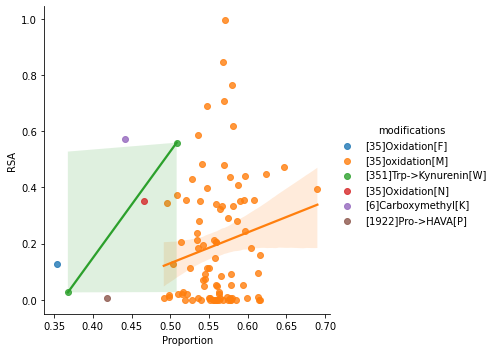

In [44]:
sns.lmplot(data=datanotnan,x="Proportion", y="RSA", hue="modifications")

In [45]:
quant2 = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD014381/mzml_files/QuantifiedPeptides.tsv", sep="\t")
quant2 = quant2.drop(quant2.filter(regex=r"Detection|Gene|Organism|QX01860|QX01863|QX01866|QX01869|QX01872|QX01862|QX01865|QX01868|QX01984|QX01874|Unnamed"), axis=1)
uniprot = pd.read_csv("/home/robbe/ionbot/full_projects_/PXD014381/PXD014381_first.csv")
uniprot = uniprot[["matched_peptide", "proteins"]]

In [46]:
quant2.head()

,Sequence,Base Sequence,Protein Groups,Intensity_QX01983,Intensity_QX01981_160316090220,Intensity_QX01867,Intensity_QX01870,Intensity_QX01873
0,AAAAAAAAAAAAAAAAGATCLER20|[935]Atto495Maleimid...,AAAAAAAAAAAAAAAAGATCLER,NaN,47058.228820,24690.747110,44406.642762,18168.746760,54605.315154
1,AAAAAAAAAAGAAGGR0|[1]Acetyl[N-TERM],AAAAAAAAAAGAAGGR,PABP2_HUMAN,129517.597656,0.000000,481211.996591,302777.359885,213909.931352
2,AAAAAAAAAVSRnan,AAAAAAAAAVSR,ZFP91_HUMAN,0.000000,0.000000,0.000000,112105.915762,281457.603093
3,AAAAAAAAVPSAGPAGPAPTSAAGR0|[9999530]Methyl_2H(...,AAAAAAAAVPSAGPAGPAPTSAAGR,IRS2_HUMAN,63407.311152,59624.367739,53639.438011,36745.445000,44285.329709
4,AAAAAAAAVPSAGPAGPAPTSAAGRnan,AAAAAAAAVPSAGPAGPAPTSAAGR,IRS2_HUMAN,118876.701823,106176.450985,139094.097046,145640.214850,227152.122867


In [47]:
cols = [col for col in quant2.columns if "Intensity" in col]

In [48]:
OA.quantile_transform(quant2, cols)

,Sequence,Base Sequence,Protein Groups,Intensity_QX01983,Intensity_QX01981_160316090220,Intensity_QX01867,Intensity_QX01870,Intensity_QX01873
0,AAAAAAAAAAAAAAAAGATCLER20|[935]Atto495Maleimid...,AAAAAAAAAAAAAAAAGATCLER,NaN,4.372639,3.523682,4.400160,3.401434,4.591682
1,AAAAAAAAAAGAAGGR0|[1]Acetyl[N-TERM],AAAAAAAAAAGAAGGR,PABP2_HUMAN,5.303247,NaN,6.169423,5.891759,5.623337
2,AAAAAAAAAVSRnan,AAAAAAAAAVSR,ZFP91_HUMAN,NaN,NaN,NaN,5.171930,5.808066
3,AAAAAAAAVPSAGPAGPAPTSAAGR0|[9999530]Methyl_2H(...,AAAAAAAAVPSAGPAGPAPTSAAGR,IRS2_HUMAN,4.676989,4.532264,4.560666,4.194978,4.398649
4,AAAAAAAAVPSAGPAGPAPTSAAGRnan,AAAAAAAAVPSAGPAGPAPTSAAGR,IRS2_HUMAN,5.236192,5.081437,5.312326,5.370180,5.664369
...,...,...,...,...,...,...,...,...
39163,YYVTIIDAPGHR2|[4]Carbamidomethyl[Y],YYVTIIDAPGHR,NaN,5.580118,6.640905,6.551308,6.466503,5.486956
39164,YYVTIIDAPGHRDFIK16|[320]Nethylmaleimide+water[K],YYVTIIDAPGHRDFIK,NaN,3.601388,6.835722,4.361186,6.523131,5.560146
39165,YYVTIIDAPGHRnan,YYVTIIDAPGHR,NaN,7.709895,8.005161,7.941307,7.915585,7.586481
39166,YYVTIIDAPNHR10|Gly->Asn[G],YYVTIIDAPNHR,NaN,NaN,NaN,6.480881,NaN,NaN


In [49]:
quant2prot = quant2[~quant2["Protein Groups"].isna()]

In [50]:
quant2prot['Counts'] = quant2prot.groupby(['Base Sequence'])['Sequence'].transform('count')

In [51]:
nonmodifieds = quant2prot[quant2prot["Sequence"].str.endswith("nan")]
modifieds = quant2prot[~quant2prot["Sequence"].str.endswith("nan")]

In [52]:
nonmodifieds2 = nonmodifieds[nonmodifieds["Counts"] == 2]
modifieds2 = modifieds[modifieds["Counts"] == 2]

In [53]:
modifieds2['sepcounts'] = modifieds2.groupby("Base Sequence")["Sequence"].transform('count')

In [54]:
POI = modifieds2[modifieds2['sepcounts'] == 1]

POI["modifications"] = POI["Sequence"].apply(OA.flashLFQmods)

In [55]:
POIox = POI[POI["modifications"].isin(OA.modslist)]

In [56]:
basepeptides = nonmodifieds2.dropna(thresh=7, axis=0)
modifiedpeptides = POIox.dropna(thresh=9, axis =0)

In [57]:
basepeptides['median']=basepeptides.filter(like='Intensity').apply(lambda x: x.median(), axis=1)
modifiedpeptides['median']= modifiedpeptides.filter(like='Intensity').apply(lambda x: x.median(), axis=1)


In [58]:
data = basepeptides.merge(modifiedpeptides, how="right",on="Base Sequence", suffixes=('_base', '_modified'))

In [59]:
data2 = data[data['Sequence_base'].notna()]

In [60]:
data2["Proportion"] = data2["median_modified"] / (data2["median_modified"] + data2["median_base"])

In [61]:
pattern = r"(\d+)\|"
data2["position"] = data2["Sequence_modified"].apply(lambda x: re.findall(pattern=pattern, string=x)[0])

In [62]:
data2["Protein Groups_base"] = data2["Protein Groups_base"].apply(lambda x: re.sub("sp\|", "", string=x))


<>:1: DeprecationWarning: invalid escape sequence \|
<>:1: DeprecationWarning: invalid escape sequence \|
/tmp/ipykernel_889339/971013840.py:1: DeprecationWarning: invalid escape sequence \|
  data2["Protein Groups_base"] = data2["Protein Groups_base"].apply(lambda x: re.sub("sp\|", "", string=x))


In [63]:
data2 = data2.merge(uniprot,left_on="Base Sequence", right_on="matched_peptide", how="left").drop_duplicates()

In [64]:
data2["UP_acc"] = data2["proteins"].apply(lambda x: x.split("(")[4].replace(")",""))

In [65]:
data2["UP_acc"] = data2["UP_acc"].apply(lambda x: re.sub("sp\|","", x))

<>:1: DeprecationWarning: invalid escape sequence \|
<>:1: DeprecationWarning: invalid escape sequence \|
/tmp/ipykernel_889339/2742094426.py:1: DeprecationWarning: invalid escape sequence \|
  data2["UP_acc"] = data2["UP_acc"].apply(lambda x: re.sub("sp\|","", x))


In [66]:
data2["ProtPos"] = data2["UP_acc"].astype(str) + "|" +  data2["position"].astype(str)

In [67]:
data2["RSA"] = data2.apply(RSA_calc, axis=1)

HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 4

In [68]:
data2notnan = data2[data2['RSA'].notna()]

In [69]:
data2notnan

,Sequence_base,Base Sequence,Protein Groups_base,Intensity_QX01983_base,Intensity_QX01981_160316090220_base,Intensity_QX01867_base,Intensity_QX01870_base,Intensity_QX01873_base,Counts_base,median_base,...,sepcounts,modifications,median_modified,Proportion,position,matched_peptide,proteins,UP_acc,ProtPos,RSA
0,AAFDDAIAELDTLSEESYKDSTLIMQLLRnan,AAFDDAIAELDTLSEESYKDSTLIMQLLR,1433E_HUMAN,3.167275,4.831832,5.654213,4.525519,5.513218,2.0,4.831832,...,1,[35]oxidation[M],4.475787,0.480873,25,AAFDDAIAELDTLSEESYKDSTLIMQLLR,1433E_HUMAN((197-226))((P62258)),P62258,P62258|25,0.090426
9,AAHSEGNTTAGLDMRnan,AAHSEGNTTAGLDMR,TCPB_HUMAN,5.440595,5.612843,5.754225,5.729709,6.133470,2.0,5.729709,...,1,[35]oxidation[M],4.919023,0.461935,14,AAHSEGNTTAGLDMR,TCPB_HUMAN((467-482))((P78371)),P78371,P78371|14,0.042553
48,AASDIAMTELPPTHPIRnan,AASDIAMTELPPTHPIR,1433E_HUMAN,5.162953,5.134238,5.625536,5.373625,4.544190,2.0,5.162953,...,1,[35]oxidation[M],4.927725,0.488344,7,AASDIAMTELPPTHPIR,1433E_HUMAN((154-171))((P62258)),P62258,P62258|7,0.691489
61,ADMVIEAVFEDLSLKnan,ADMVIEAVFEDLSLK,ECHA_HUMAN,5.017435,4.634290,3.299142,4.315740,4.366904,2.0,4.366904,...,1,[35]oxidation[M],4.726930,0.519795,3,ADMVIEAVFEDLSLK,ECHA_HUMAN((441-456))((P40939)),P40939,P40939|3,0.000000
87,AELDDTPMRnan,AELDDTPMR,SFPQ_HUMAN,NaN,NaN,5.920760,6.274506,6.749165,2.0,6.274506,...,1,[35]oxidation[M],6.354262,0.503158,8,AELDDTPMR,SFPQ_HUMAN((350-359))((P23246)),P23246,P23246|8,0.106383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,VWDISGLRnan,VWDISGLR,COPA_HUMAN,6.592134,6.370324,6.433807,6.605969,6.467287,2.0,6.467287,...,1,[425]Dioxidation[W],5.051418,0.438540,2,VWDISGLR,COPA_HUMAN((161-169))((P53621)),P53621,P53621|2,0.026432
3473,WTAISALEYGVPVTLIGEAVFARnan,WTAISALEYGVPVTLIGEAVFAR,6PGD_HUMAN,5.685207,6.315437,5.271482,5.349089,5.117561,2.0,5.349089,...,1,[1922]Pro->HAVA[P],3.625619,0.403982,12,WTAISALEYGVPVTLIGEAVFAR,6PGD_HUMAN((266-289))((P52209)),P52209,P52209|12,0.014706
3506,YFVEAGAMAVRnan,YFVEAGAMAVR,TCPA_HUMAN,6.296067,6.386587,6.312237,6.332756,5.946445,2.0,6.312237,...,1,[35]oxidation[M],5.620325,0.471007,8,YFVEAGAMAVR,TCPA_HUMAN((299-310))((P17987)),P17987,P17987|8,0.000000
3521,YLTLDGFDAMFRnan,YLTLDGFDAMFR,CYFP1_HUMAN,3.877196,NaN,3.746605,3.545153,4.009610,2.0,3.811900,...,1,[35]oxidation[M],4.294782,0.529783,10,YLTLDGFDAMFR,CYFP1_HUMAN((815-827))((Q7L576)),Q7L576,Q7L576|10,0.000000


In [70]:
data2notnan.to_csv("/home/robbe/ionbot/RSA_data/PXD019823RSA.csv")

In [71]:
data2notnan = pd.read_csv('/home/robbe/ionbot/RSA_data/PXD019823RSA.csv')

/home/robbe/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
/home/robbe/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


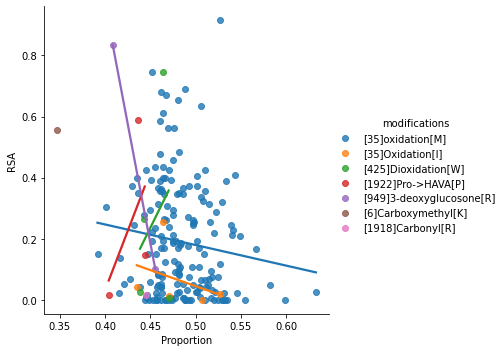

In [72]:
sns.lmplot(data=data2notnan,x="Proportion", y="RSA", hue="modifications", ci=None)

In [73]:
concat = pd.concat([datanotnan,data2notnan])

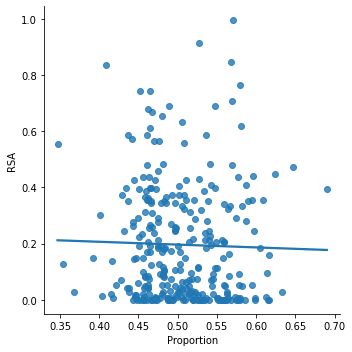

In [74]:
sns.lmplot(data=concat,x="Proportion", y="RSA", ci=None)